In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
!unzip -qq '/content/drive/MyDrive/Project/dacon_book.zip'

In [5]:
train_df = pd.read_csv('/content/train.csv')
train_df

,ID,User-ID,Book-ID,Book-Rating,Age,Location,Book-Title,Book-Author,Year-Of-Publication,Publisher
0,TRAIN_000000,USER_00000,BOOK_044368,8,23.0,"sackville, new brunswick, canada",Road Taken,Rona Jaffe,2001.0,Mira
1,TRAIN_000001,USER_00000,BOOK_081205,8,23.0,"sackville, new brunswick, canada",Macbeth (New Penguin Shakespeare),William Shakespeare,1981.0,Penguin Books
2,TRAIN_000002,USER_00000,BOOK_086781,0,23.0,"sackville, new brunswick, canada",Waverley (Penguin English Library),Walter Scott,1981.0,Penguin Books
3,TRAIN_000003,USER_00000,BOOK_098622,0,23.0,"sackville, new brunswick, canada",Mother Earth Father Sky,Sue Harrison,1991.0,Avon
4,TRAIN_000004,USER_00000,BOOK_180810,8,23.0,"sackville, new brunswick, canada",She Who Remembers,Linda Lay Shuler,1989.0,Signet Book
...,...,...,...,...,...,...,...,...,...,...
871388,TRAIN_871388,USER_92096,BOOK_081138,0,34.0,"minneapolis, minnesota, usa",Healing Words: The Power of Prayer and the Pra...,Larry Dossey,1993.0,Harpercollins
871389,TRAIN_871389,USER_92097,BOOK_258124,0,35.0,"temple, texas, usa",The Salmon of Doubt: Hitchhiking the Galaxy On...,DOUGLAS ADAMS,2002.0,Harmony
871390,TRAIN_871390,USER_92098,BOOK_071848,0,45.0,"ottawa, ontario, canada",Harry Potter and the Prisoner of Azkaban (Book 3),J. K. Rowling,2000.0,Thorndike Press
871391,TRAIN_871391,USER_92099,BOOK_252599,8,43.0,"maple grove, minnesota, usa",Heartbreak Hill: Anatomy of a Ryder Cup,Tim Rosaforte,1996.0,St Martins Pr


In [6]:
train_df.isnull().sum()

ID                     0
User-ID                0
Book-ID                0
Book-Rating            0
Age                    0
Location               0
Book-Title             0
Book-Author            0
Year-Of-Publication    0
Publisher              0
dtype: int64

In [7]:
ds = train_df['Book-Rating'].value_counts().reset_index()

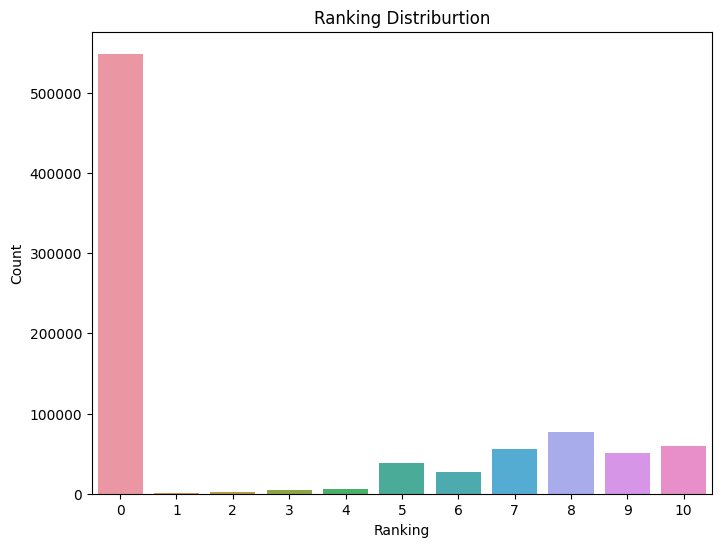

In [8]:
ds.columns = ['value', 'count']

fig, ax = plt.subplots(figsize=  (8,6))
sns.barplot(x =  'value', y='count', data=ds, ax =ax)
ax.set_title('Ranking Distriburtion')
ax.set_xlabel('Ranking')
ax.set_ylabel('Count')
plt.show()

In [9]:
ds = train_df['Year-Of-Publication'].value_counts().reset_index()

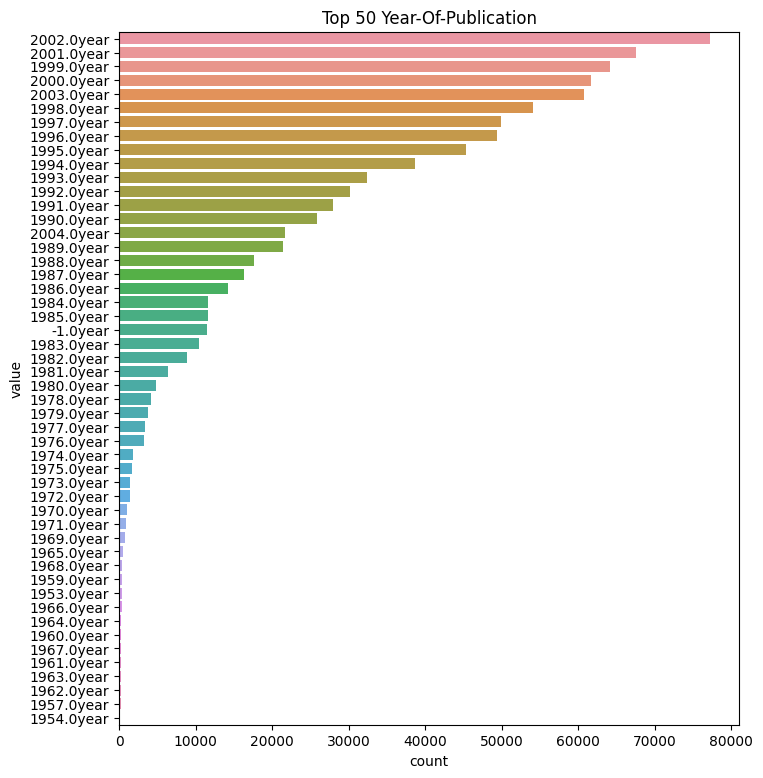

In [10]:
ds.columns = ['value','count']

ds['value'] = ds['value'].astype(str) + 'year'
ds = ds.sort_values('count', ascending=False).head(50)

plt.figure(figsize=(8,9))
sns.barplot(data=ds,x = 'count', y= 'value',  orient='h')
plt.title('Top 50 Year-Of-Publication')
plt.show()

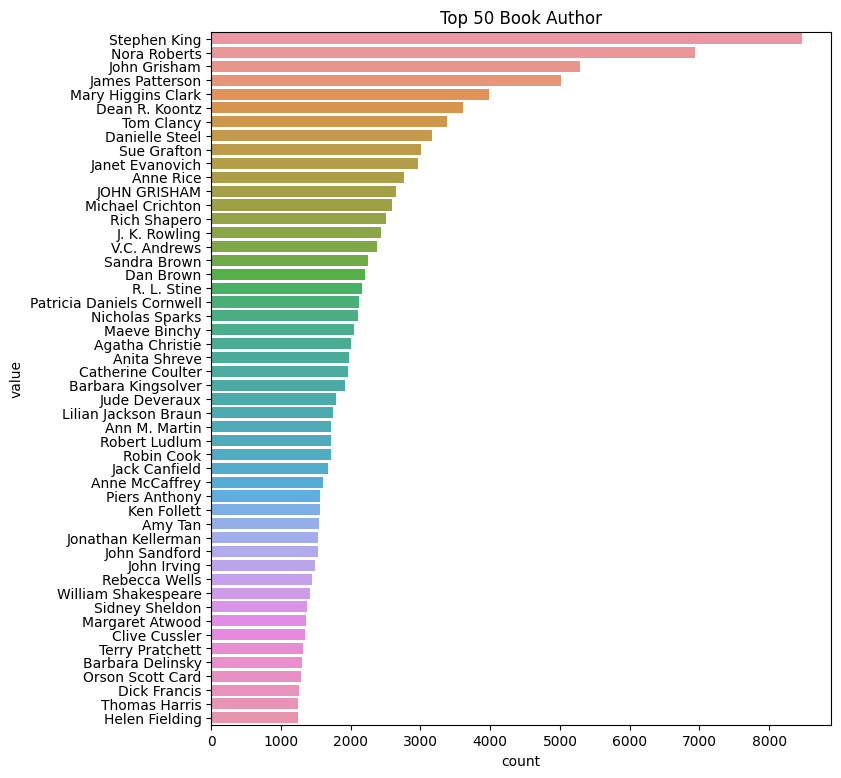

In [11]:
import matplotlib.pyplot as plt
import seaborn as sns

ds = train_df['Book-Author'].value_counts().reset_index()
ds.columns = ['value', 'count']
ds = ds.sort_values('count', ascending=False).head(50)

plt.figure(figsize = (8,9))
sns.barplot(data = ds, x = 'count', y='value', orient = 'h')
plt.title('Top 50 Book Author')
plt.show()

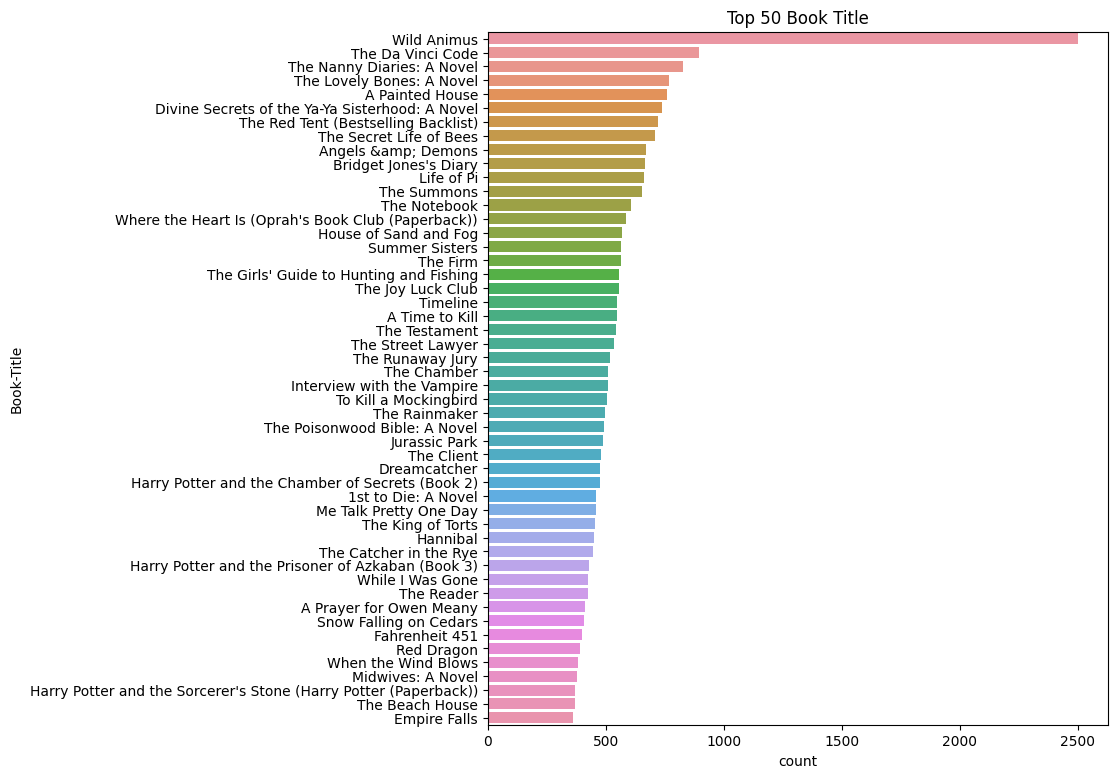

In [12]:
ds = train_df['Book-Title'].value_counts().reset_index()
ds.columns = ['Book-Title', 'count']
ds = ds.sort_values('count', ascending=False).head(50)

plt.figure(figsize = (8,9))
sns.barplot(data=ds, x='count', y='Book-Title')
plt.title('Top 50 Book Title')
plt.xlabel('count')
plt.ylabel('Book-Title')
plt.show()

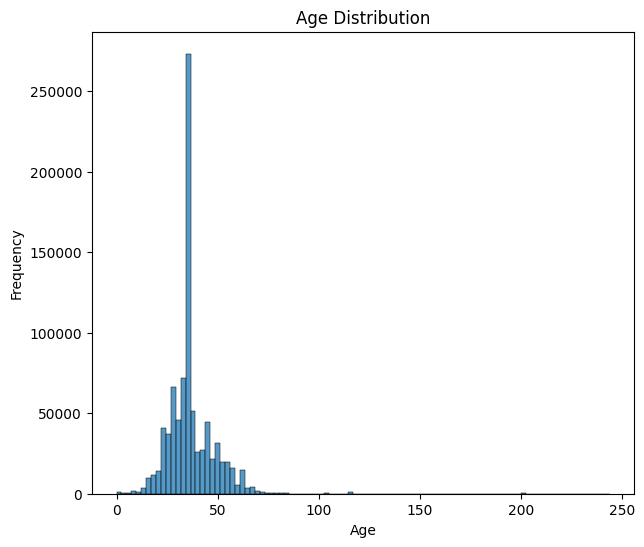

In [13]:
plt.figure(figsize=(7,6))
sns.histplot(train_df['Age'], bins=100)
plt.title('Age Distribution')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()

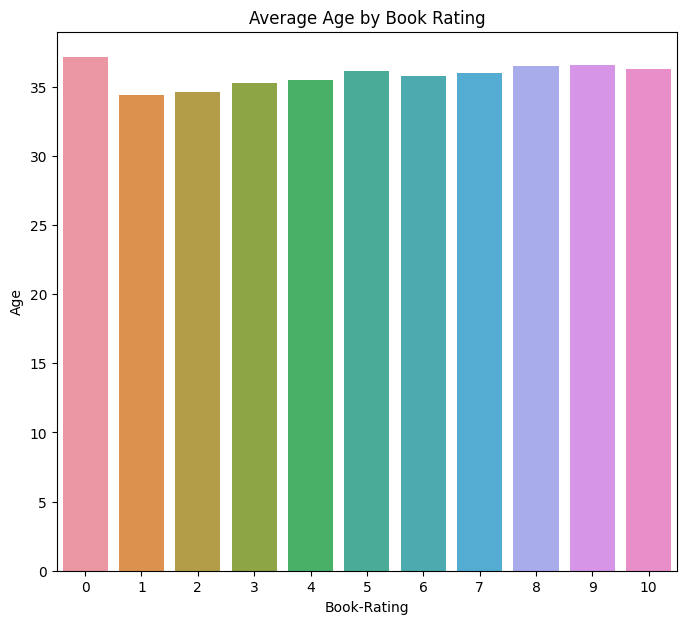

In [14]:
data = train_df.groupby('Book-Rating')['Age'].mean().reset_index()

plt.figure(figsize=(8,7))
sns.barplot(data = data, x='Book-Rating', y='Age')
plt.title('Average Age by Book Rating')
plt.show()

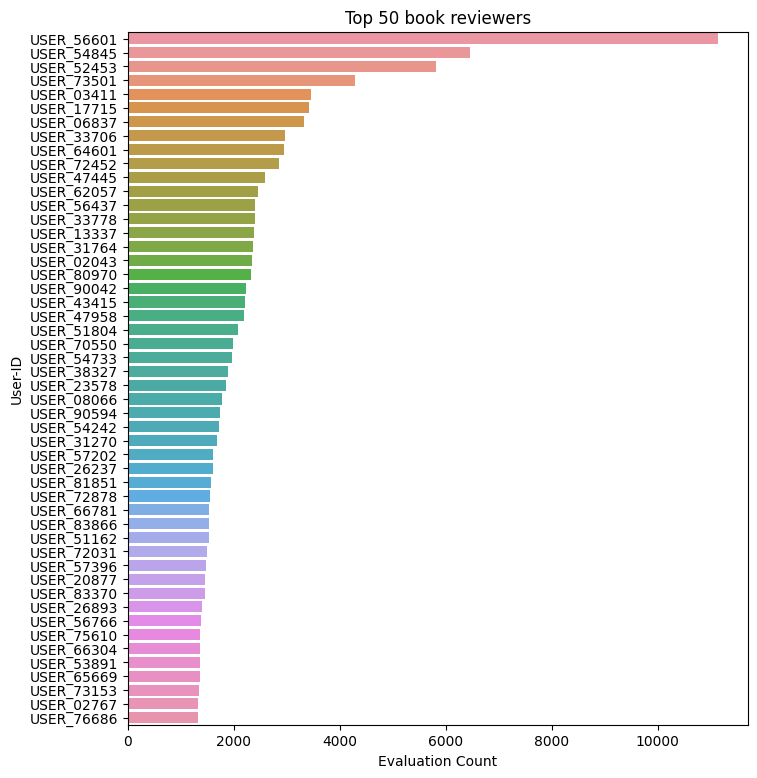

In [15]:
users = train_df['User-ID'].value_counts().reset_index()
users.columns = ['User-ID', 'evaluation_count']
users = users.sort_values('evaluation_count',ascending=False)

plt.figure(figsize=(8,9))
sns.barplot(x='evaluation_count', y='User-ID', data=users.head(50))
plt.title('Top 50 book reviewers')
plt.xlabel('Evaluation Count')
plt.ylabel('User-ID')
plt.show()

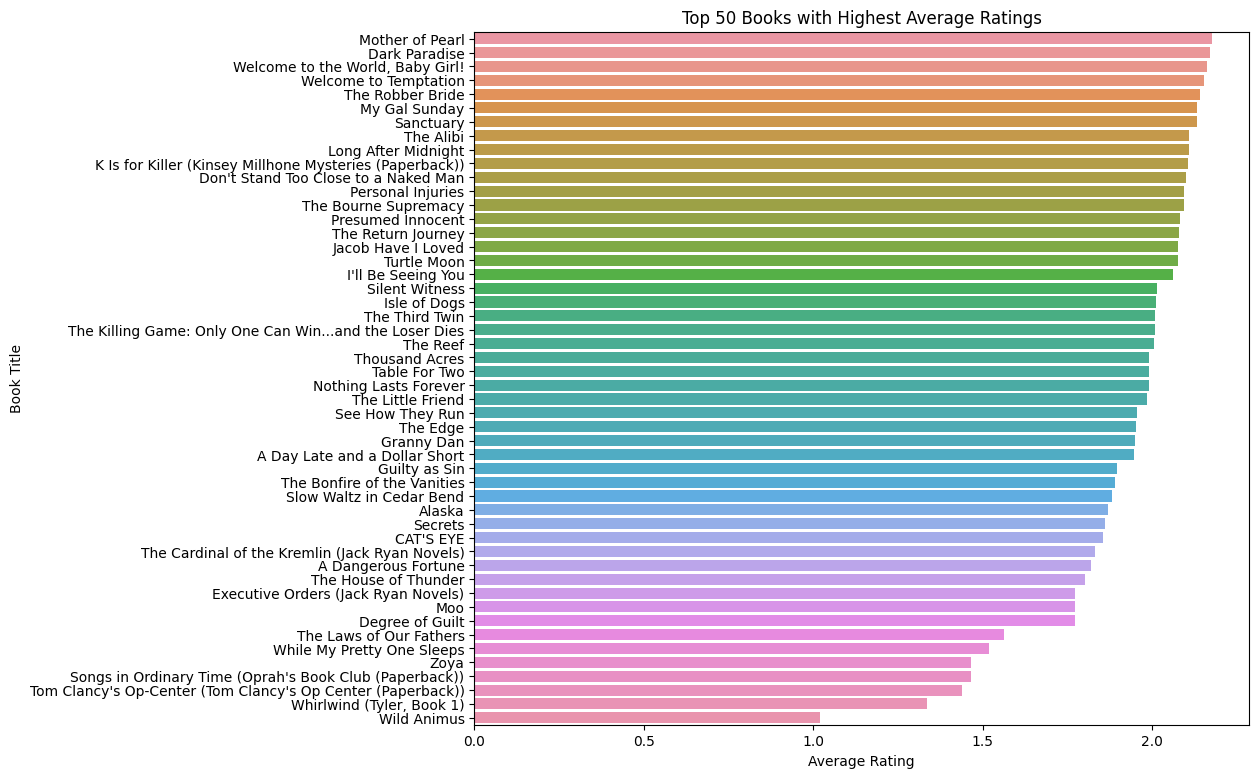

In [16]:
books = train_df['Book-Title'].value_counts().reset_index()
books.columns = ['Book-Title', 'book_evaluation_count']
df = pd.merge(train_df, books)
mean_df = df[df['book_evaluation_count']>100]
mean_df = mean_df.groupby('Book-Title')['Book-Rating'].mean().reset_index().sort_values('Book-Rating', ascending=False)

plt.figure(figsize=(10, 9))
sns.barplot(data=mean_df.tail(50), x='Book-Rating', y='Book-Title')
plt.title('Top 50 Books with Highest Average Ratings')
plt.xlabel('Average Rating')
plt.ylabel('Book Title')
plt.show()

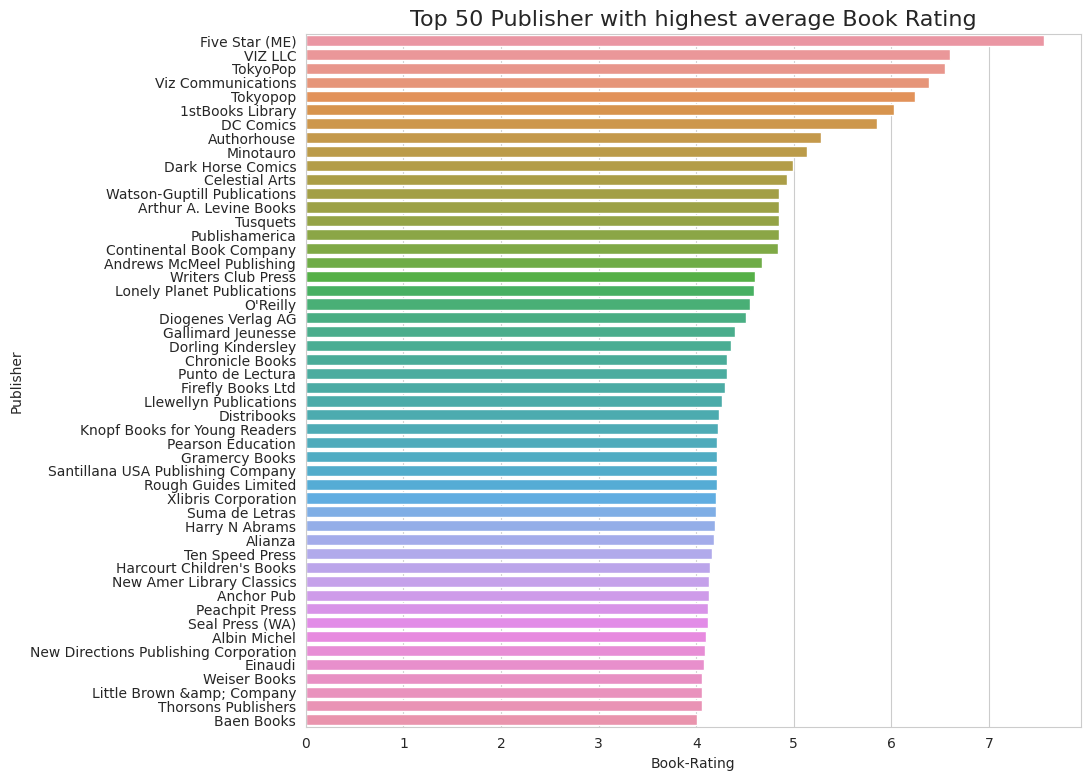

In [17]:
books = df['Publisher'].value_counts().reset_index()
books.columns = ['Publisher', 'Publisher_evaluation_count']
df = pd.merge(df, books)
mean_df = df[df['Publisher_evaluation_count'] > 100]
mean_df = mean_df.groupby('Publisher')['Book-Rating'].mean().reset_index().sort_values('Book-Rating', ascending=False)

sns.set_style('whitegrid')
plt.figure(figsize=(10, 9))
sns.barplot(x = 'Book-Rating', y='Publisher', data=mean_df.head(50), orient = 'h')
plt.title('Top 50 Publisher with highest average Book Rating', fontsize=16)
plt.show()

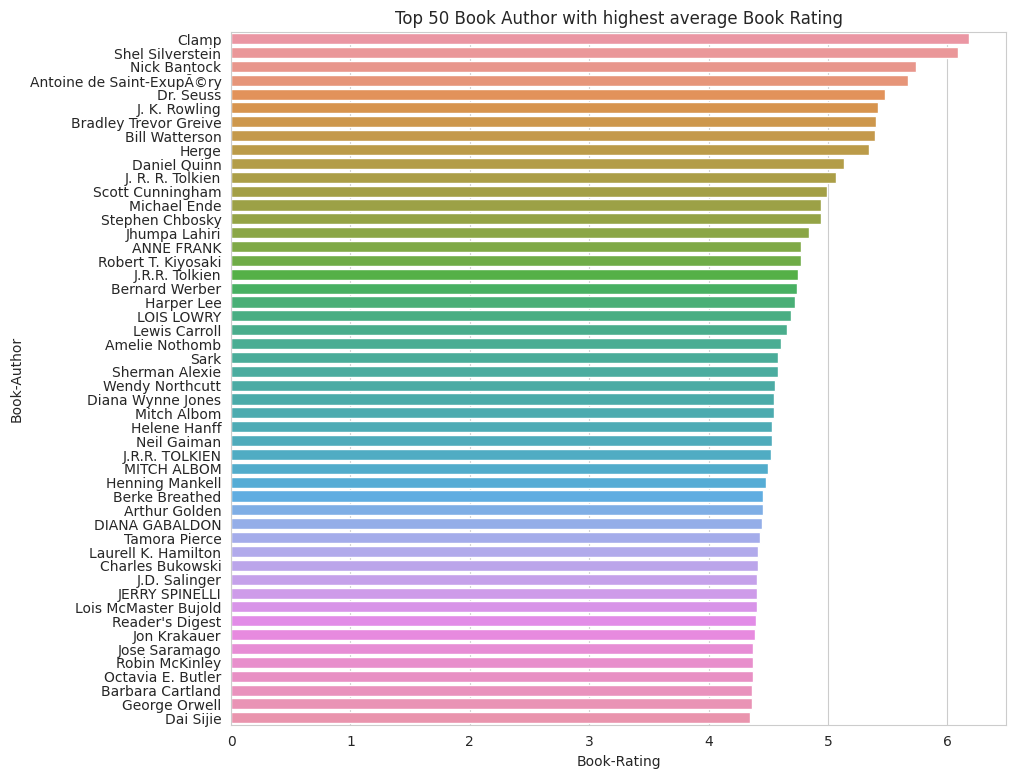

In [18]:
books = df['Book-Author'].value_counts().reset_index()
books.columns = ['Book-Author','author_evaluation_count']
df = pd.merge(df, books)

mean_df = df[df['author_evaluation_count'] > 100]
mean_df = mean_df.groupby('Book-Author')['Book-Rating'].mean().reset_index().sort_values('Book-Rating', ascending=False)

top_50_mean_df = mean_df.head(50)

plt.figure(figsize=(10,9))
sns.barplot(x = 'Book-Rating', y='Book-Author', data=top_50_mean_df, orient = 'h')
plt.title('Top 50 Book Author with highest average Book Rating')
plt.show()